In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


\begin{exercise}
Modify the following  keras code to approximate the function given in Lab 1.

\end{exercise}


# Approximate Functions using Neural Nets with Keras implementation

\begin{example}
Consider the nonlinear function $\exp(x)$ and try to approximate it with a neural network using keras platform

\end{example}


In [ ]:
import keras as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

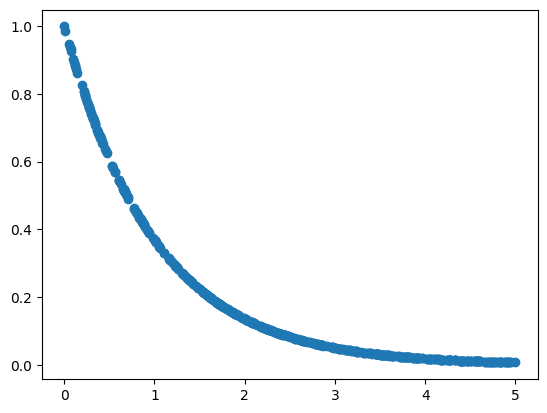

In [ ]:
DATA_SIZE = 500

def gen_data():
    x_ = 5 * np.random.rand(DATA_SIZE)
    y_ = np.exp(-x_)
    return x_, y_

x, y = gen_data()
plt.scatter(x,y)
plt.show()

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import Callback
from keras import regularizers
from keras import optimizers
import tensorflow as tf

## neural net solution

- one intermediate layer with 8 cells, 

- activation elu, 

- optimizer: stochastic gradient optimizer with batch size 32

- loss function: mean square error

- metrics for the performance of the network: Root Mean Square Error, Mean Absolute Error

- number of iterations or epochs is 10 in this example

In [ ]:
x_test, y_test = gen_data()
model = K.Sequential([
    K.layers.Dense(8, input_shape=(1,)),
    K.layers.Activation("elu"),
    K.layers.Dense(1),
])
sgd = tf.keras.optimizers.SGD(0.01, momentum=0.9)

#model.compile(optimizer=sgd, loss="mse")
model.compile(
    optimizer = sgd,
    loss='mean_squared_error',
    metrics=[
        'RootMeanSquaredError',
        'MeanAbsoluteError',
    ]
)

model.fit(x=x,y=y,epochs=10, verbose=1,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
16/16 [==============================] - 1s 21ms/step - loss: 0.0555 - root_mean_squared_error: 0.2355 - mean_absolute_error: 0.1431 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1442 - val_mean_absolute_error: 0.0913
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - mean_absolute_error: 0.1016 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303 - val_mean_absolute_error: 0.1129
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - mean_absolute_error: 0.1068 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1295 - val_mean_absolute_error: 0.1015
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - mean_absolute_error: 0.0902 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150 - val_mean_absolute_error: 0.0862
Epoch 5/10
16/16 [==============================] - 0s 4ms/step

## The architecture of the above NN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## k - fold evaluation of the NN model

In [ ]:
# k fold evaluation
# our data have a random noise so every time we generate new data we get different evaluation score
# for k = 1 it performs just an evaluation and returns
def kfold_eval(model, k_fold = 5):
  cvscores = []
  for k in range(k_fold):
    x_test,y_test = gen_data()
    scores = model.evaluate(x_test, y_test, verbose=1)
    print(model.metrics_names[1], scores[1])
    cvscores.append(scores[1])
  return cvscores

cvscores = kfold_eval(model)
print(f'K fold evaluation: mean loss= {np.mean(cvscores)}, std = {np.std(cvscores)}')

16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - mean_absolute_error: 0.0657
root_mean_squared_error 0.08197758346796036
16/16 [==============================] - 0s 3ms/step - loss: 0.0070 - root_mean_squared_error: 0.0837 - mean_absolute_error: 0.0642
root_mean_squared_error 0.08371195197105408
16/16 [==============================] - 0s 3ms/step - loss: 0.0071 - root_mean_squared_error: 0.0844 - mean_absolute_error: 0.0666
root_mean_squared_error 0.08436699956655502
16/16 [==============================] - 0s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - mean_absolute_error: 0.0605
root_mean_squared_error 0.0770440623164177
16/16 [==============================] - 0s 2ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825 - mean_absolute_error: 0.0663
root_mean_squared_error 0.0825207307934761
K fold evaluation: mean loss= 0.08192426562309266, std = 0.002582160700025232


## print the test results

In [ ]:
def print_test(model, x_test, y_test):
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test MAE:', scores[1])
  print('Test RMSE', scores[2])

def print_train(model, x_train, y_train):
  scores = model.evaluate(x_train, y_train, verbose=1)
  print('Train loss:', scores[0])
  print('Train MAE:', scores[1])
  print('Train RMSE', scores[2])


print_test(model, x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.0070 - root_mean_squared_error: 0.0837 - mean_absolute_error: 0.0645
Test loss: 0.006999884266406298
Test MAE: 0.08366531133651733
Test RMSE 0.0644955262541771


## Plots the function and its NN approximation

16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - mean_absolute_error: 0.0641
Train loss: 0.006395348813384771
Train MAE: 0.07997092604637146
Train RMSE 0.06405710428953171
16/16 [==============================] - 0s 2ms/step


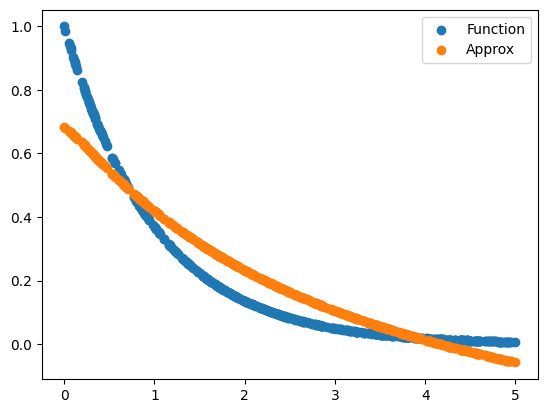

In [ ]:
def plot_approx(model,x,y):
  print_train(model,x,y)
  plt.scatter(x,y)
  plt.scatter(x, model.predict(x))
  plt.legend(['Function', 'Approx'])
  plt.show()
plot_approx(model,x,y)

## Solution with more iterations 
If we train this model with more epochs we will get a better approximation

In [ ]:
x_test, y_test = gen_data()
model = K.Sequential([
    K.layers.Dense(8, input_shape=(1,)),
    K.layers.Activation("elu"),
    K.layers.Dense(1),
])
sgd = tf.keras.optimizers.SGD(0.01, momentum=0.9)

#model.compile(optimizer=sgd, loss="mse")
model.compile(
    optimizer = sgd,
    loss='mean_squared_error',
    metrics=[
        'RootMeanSquaredError',
        'MeanAbsoluteError',
    ]
)

model.fit(x=x,y=y,epochs=20, verbose=1,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 0.0678 - root_mean_squared_error: 0.2603 - mean_absolute_error: 0.1974 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1815 - val_mean_absolute_error: 0.1449
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 0.0236 - root_mean_squared_error: 0.1538 - mean_absolute_error: 0.1282 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1322 - val_mean_absolute_error: 0.1102
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0157 - root_mean_squared_error: 0.1252 - mean_absolute_error: 0.1045 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1147 - val_mean_absolute_error: 0.0908
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - mean_absolute_error: 0.0811 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958 - val_mean_absolute_error: 0.0723
Epoch 5/20
16/16 [==============================] - 0s 6ms/step

16/16 [==============================] - 0s 2ms/step - loss: 3.7205e-04 - root_mean_squared_error: 0.0193 - mean_absolute_error: 0.0149
Train loss: 0.0003720504464581609
Train MAE: 0.01928860880434513
Train RMSE 0.014852755703032017
16/16 [==============================] - 0s 2ms/step


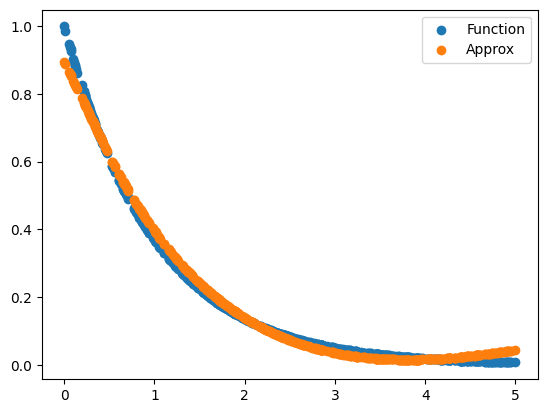

In [ ]:
plot_approx(model,x,y)

# Exercise 1

Try to use two internal layers with upp to 10 cells

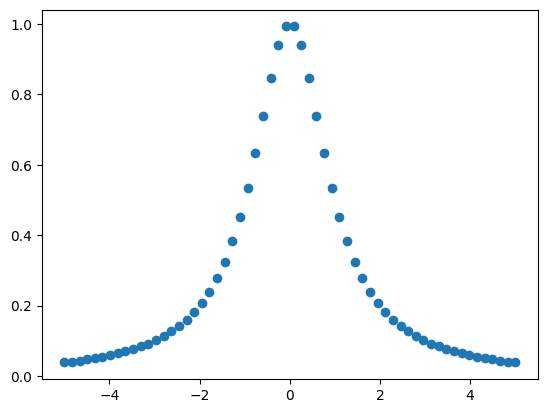

In [ ]:
#the function we want to approach using OLS
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 1 / (1 + np.multiply(x,x))

def get_points():
    return np.linspace(start=-5, stop=5, num=60)

x = get_points()
y = f(x)

def plot_f(x, y):
  plt.scatter(x, y)
  plt.show()

plot_f(x,y)

In [ ]:
# Define the neural network model
model = K.Sequential([
    K.layers.Dense(10, input_shape=(1,)),
    K.layers.Activation("relu"),
    K.layers.Dense(10, input_shape=(1,)),
    K.layers.Activation("relu"),
    K.layers.Dense(1),
])
sgd = tf.keras.optimizers.SGD(0.01, momentum=0.9)

model.compile(
    optimizer = sgd,
    loss='mean_squared_error',
    metrics=[
        'RootMeanSquaredError',
        'MeanAbsoluteError',
    ]
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model on the cached dataset
model.fit(x, y, epochs=200, verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 202ms/step - loss: 1.0617 - root_mean_squared_error: 1.0304 - mean_absolute_error: 0.9753 - val_loss: 0.3668 - val_root_mean_squared_error: 0.6056 - val_mean_absolute_error: 0.6006
Epoch 2/200
2/2 [==============================] - 0s 33ms/step - loss: 0.2808 - root_mean_squared_error: 0.5299 - mean_absolute_error: 0.4837 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1236 - val_mean_absolute_error: 0.1198
Epoch 3/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1137 - root_mean_squared_error: 0.3372 - mean_absolute_error: 0.2652 - val_loss: 0.0983 - val_root_mean_squared_error: 0.3136 - val_mean_absolute_error: 0.3134
Epoch 4/200
2/2 [==============================] - 0s 52ms/step - loss: 0.2148 - root_mean_squared_error: 0.4635 - mean_absolute_error: 0.4017 - val_loss: 0.3517 - val_root_mean_squared_error: 0.5930 - val_mean_absolute_error: 0.5919
Epoch 5/200
2/2 [==============================] - 0s 36ms/step

## k - fold evaluation of the NN model

In [ ]:
# k fold evaluation
# our data have a random noise so every time we generate new data we get different evaluation score
# for k = 1 it performs just an evaluation and returns
def kfold_eval(model, k_fold = 10):
  cvscores = []
  for k in range(k_fold):
    scores = model.evaluate(x, y, verbose=1)
    print(model.metrics_names[1], scores[1])
    cvscores.append(scores[1])
  return cvscores

cvscores = kfold_eval(model)
print(f'K fold evaluation: mean loss= {np.mean(cvscores)}, std = {np.std(cvscores)}')

2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - mean_absolute_error: 0.0642
root_mean_squared_error 0.10212069749832153
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - mean_absolute_error: 0.0642
root_mean_squared_error 0.10212069749832153
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - mean_absolute_error: 0.0642
root_mean_squared_error 0.10212069749832153
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - mean_absolute_error: 0.0642
root_mean_squared_error 0.10212069749832153
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - mean_absolute_error: 0.0642
root_mean_squared_error 0.10212069749832153
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - mean_absolute_error: 0.0642


Print the test result 

2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - mean_absolute_error: 0.0642
Train loss: 0.010428637266159058
Train MAE: 0.10212069749832153
Train RMSE 0.06421169638633728
2/2 [==============================] - 0s 6ms/step


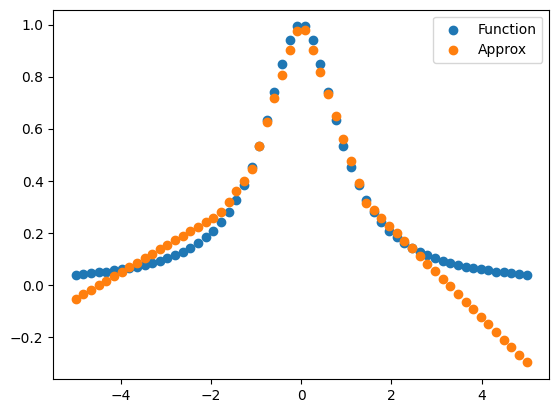

In [ ]:
plot_approx(model,x,y)


\begin{exercise}
Modify the pytorch implementation of neural net for approximating the function given in lab 1.

\end{exercise}


## PyTorch Implementation of the keras NN for approximating the $\exp(-x)$ Function

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


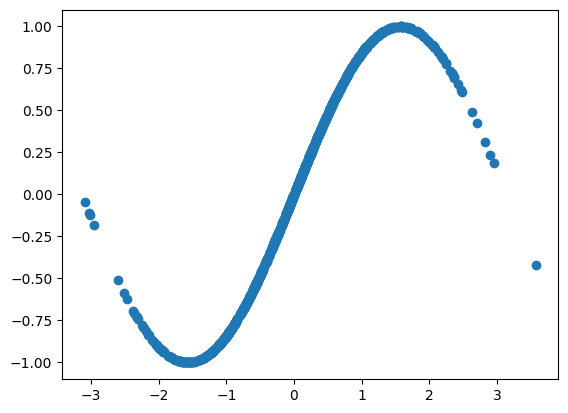

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Prepare your dataset
# train on 1000 points
# test on 100 points
x_train = torch.randn(1000, 1)
y_train = torch.sin(x_train)
x_test = torch.randn(100, 1)
y_test = torch.sin(x_test)

# Define your neural net model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define your loss function
criterion = nn.MSELoss()

# Initialize your neural net
net = Net()

# Define your optimizer
optimizer = optim.RMSprop(net.parameters(), lr=0.1)

# Train your neural net
def train(model, x, y, epochs = 200, verbose = 1):
  for epoch in range(1,epochs+1):
    outputs = model(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if verbose:
      print(f'Epoch {epoch}: Train loss {loss.item()}')

# Test your neural net
def evaluate(model, x, y):
  outputs = model(x_test)
  test_loss = criterion(outputs, y_test)
  print('Test loss: ', test_loss.item())

# Plot train dataset
plt.scatter(x_train, y_train)

In [ ]:
train(net, x_train, y_train)

Epoch 1: Train loss 0.5864866971969604
Epoch 2: Train loss 125.45431518554688
Epoch 3: Train loss 633.3170776367188
Epoch 4: Train loss 267.626708984375
Epoch 5: Train loss 14.53585147857666
Epoch 6: Train loss 10.675342559814453
Epoch 7: Train loss 8.246173858642578
Epoch 8: Train loss 6.590807914733887
Epoch 9: Train loss 5.407838821411133
Epoch 10: Train loss 4.528637886047363
Epoch 11: Train loss 3.8490748405456543
Epoch 12: Train loss 3.2990057468414307
Epoch 13: Train loss 2.8396425247192383
Epoch 14: Train loss 2.4508206844329834
Epoch 15: Train loss 2.119101047515869
Epoch 16: Train loss 1.834158182144165
Epoch 17: Train loss 1.5916188955307007
Epoch 18: Train loss 1.3863577842712402
Epoch 19: Train loss 1.2120405435562134
Epoch 20: Train loss 1.0637640953063965
Epoch 21: Train loss 0.9391036033630371
Epoch 22: Train loss 0.83286052942276
Epoch 23: Train loss 0.742056131362915
Epoch 24: Train loss 0.6645371317863464
Epoch 25: Train loss 0.5981341004371643
Epoch 26: Train loss 0

In [ ]:
evaluate(net, x_test, y_test)

Test loss:  0.19405420124530792


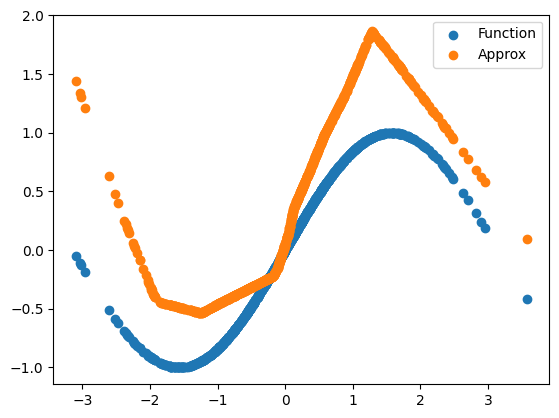

In [ ]:
def plot_approx_torch(model, x, y):
  plt.scatter(x,y)
  plt.scatter(x, model(x).detach().numpy())
  plt.legend(['Function', 'Approx'])
  plt.show()

plot_approx_torch(net, x_train, y_train)

With more epochs it can approximate the function more accuretaly 

# Exercise 2

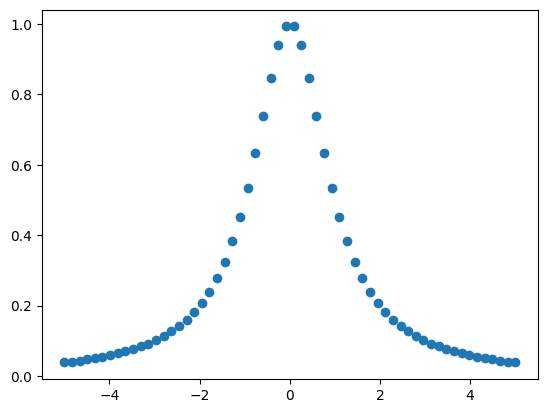

In [ ]:
#the function we want to approach using OLS
def f(x):
    return 1 / (1 + np.multiply(x,x))

def get_points():
    return np.linspace(start=-5, stop=5, num=60)

x = get_points()
y = f(x)

def plot_f(x, y):
  plt.scatter(x, y)
  plt.show()

plot_f(x,y)

Split the dataset

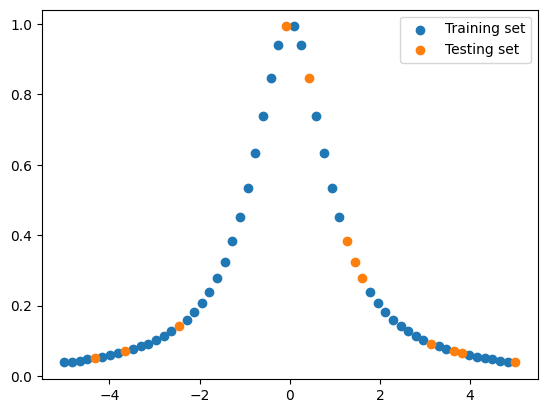

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# plot the training and testing sets
plt.scatter(x_train, y_train, label='Training set')
plt.scatter(x_test, y_test, label='Testing set')
plt.legend()
plt.show()
size = x_train.shape

Set the data to PyTorch

In [ ]:
# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2)

In [ ]:
# Define your neural net model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define your loss function
criterion = nn.MSELoss()

# Initialize your neural net
net = Net()

# Define your optimizer
optimizer = optim.RMSprop(net.parameters(), lr=0.1)

# Train your neural net
def train(model, x, y, epochs=200, verbose=1):
    for epoch in range(1, epochs+1):
        outputs = model(x)
        loss = criterion(outputs, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if verbose:
            print(f'Epoch {epoch}: Train loss {loss.item()}')

# Test your neural net
def evaluate(model, x, y):
    outputs = model(x)
    test_loss = criterion(outputs, y)
    print('Test loss: ', test_loss.item())

In [ ]:
train(net, x_train, y_train)

Epoch 1: Train loss 0.4391084611415863
Epoch 2: Train loss 634.4075927734375
Epoch 3: Train loss 0.6763924956321716
Epoch 4: Train loss 0.47568607330322266
Epoch 5: Train loss 0.37247252464294434
Epoch 6: Train loss 0.3162073791027069
Epoch 7: Train loss 0.282713383436203
Epoch 8: Train loss 0.2600192725658417
Epoch 9: Train loss 0.2425939291715622
Epoch 10: Train loss 0.2280130237340927
Epoch 11: Train loss 0.21521158516407013
Epoch 12: Train loss 0.203726127743721
Epoch 13: Train loss 0.19328242540359497
Epoch 14: Train loss 0.18370871245861053
Epoch 15: Train loss 0.17488278448581696
Epoch 16: Train loss 0.16671031713485718
Epoch 17: Train loss 0.15911535918712616
Epoch 18: Train loss 0.15203532576560974
Epoch 19: Train loss 0.14541776478290558
Epoch 20: Train loss 0.1392185091972351
Epoch 21: Train loss 0.13339979946613312
Epoch 22: Train loss 0.12792928516864777
Epoch 23: Train loss 0.12277881056070328
Epoch 24: Train loss 0.11792388558387756
Epoch 25: Train loss 0.113344639539718

In [ ]:
# Evaluate the model on the test set
evaluate(net, x_test, y_test)

Test loss:  0.025182679295539856


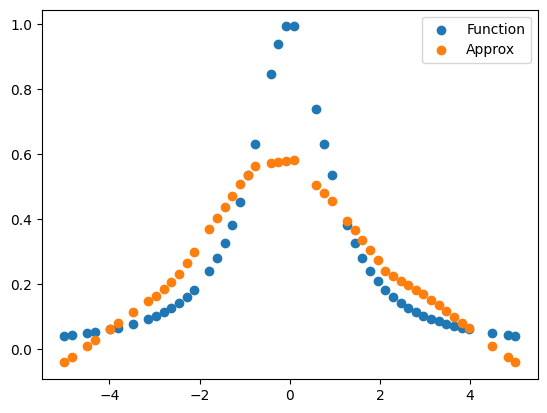

In [ ]:
plot_approx_torch(net, x_train, y_train)

\begin{exercise}
Compare the neural net solutions with the polynomial least squares you have obtained. Print the accuracies of all methods and comment on the results.

\end{exercise}


In the Keras fit good in the OLS, but in the end to is good. Maeby the problem is overfitting. In the Py Torch is good in the edge but is not good in the middle of the data. 